In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


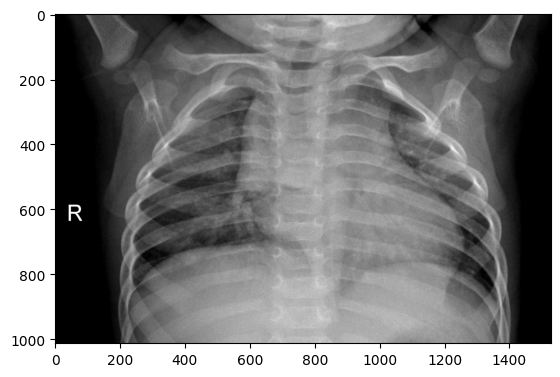

In [2]:
img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0128-0001.jpeg")
plt.imshow(img)

In [3]:
img.shape

(1013, 1528, 3)

(227, 227)


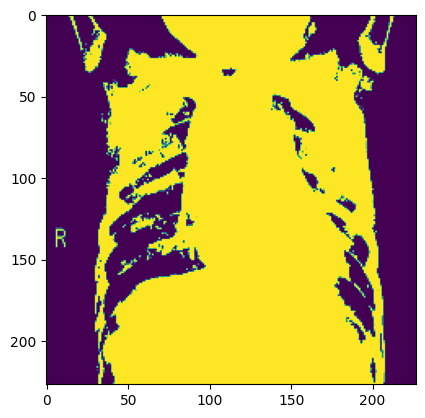

In [4]:
def process_img(img):
    kernel = np.ones((3,3), np.uint8)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresholded_image = cv2.threshold(img, 125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img = cv2.medianBlur(thresholded_image,3)
    img = cv2.resize(img, (227,227))
#     img = cv2.merge((img, img, img))
#     plt.imshow(img)
    return img
print(process_img(img).shape)
plt.imshow(process_img(img))

<Figure size 1000x500 with 0 Axes>

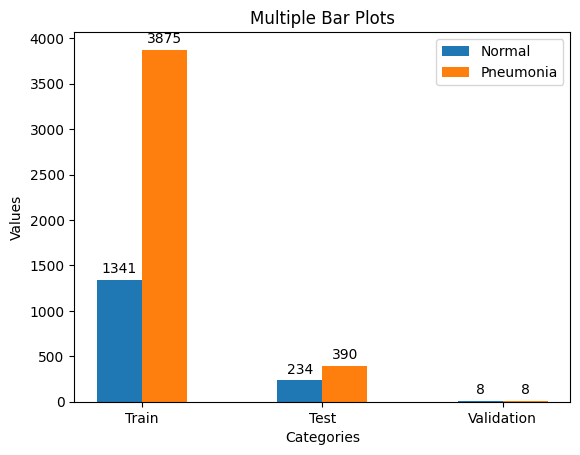

In [5]:
train_normal_len = len(os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/"))
train_pneumonia_len = len(os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/"))
test_normal_len = len(os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/"))
test_pneumonia_len = len(os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/"))
val_normal_len = len(os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/"))
val_pneumonia_len = len(os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/"))
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
width = 0.25
categories = ['Train','Test','Validation']
values1 = [train_normal_len, test_normal_len, val_normal_len]
values2 = [train_pneumonia_len, test_pneumonia_len, val_pneumonia_len]

x = np.arange(len(categories))

fig, ax = plt.subplots()

# Plotting the bars for the first dataset
rects1 = ax.bar(x - width/2, values1, width, label='Normal')

# Plotting the bars for the second dataset
rects2 = ax.bar(x + width/2, values2, width, label='Pneumonia')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Multiple Bar Plots')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to label the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to label the bars
autolabel(rects1)
autolabel(rects2)

plt.show()

In [6]:
def get_training_data(data_directory):
    images = []
    class_no = []
    labels = ['NORMAL','PNEUMONIA']
    for label in labels:
        path = os.path.join(data_directory,label)
        _index =  labels.index(label)
        for img in os.listdir(path):
            img_arr = cv2.imread(os.path.join(path, img))
            img_arr = process_img(img_arr)
            images.append(img_arr)
            class_no.append(_index)
    return images, class_no

In [7]:
train_data_img, train_data_class = get_training_data("/kaggle/input/chest-xray-pneumonia/chest_xray/train")
test_data_image, test_data_class = get_training_data("/kaggle/input/chest-xray-pneumonia/chest_xray/test")
val_data_image, val_data_class = get_training_data("/kaggle/input/chest-xray-pneumonia/chest_xray/val")

In [8]:
X_train = np.array(train_data_img)
Y_train = np.array(train_data_class)
X_test = np.array(test_data_image)
Y_test = np.array(test_data_class)
X_val = np.array(val_data_image)
Y_val = np.array(val_data_class)

In [9]:
##Data normalization because CNN works well with normalized data i.e. between [0,1] rather than [0,255]
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
X_val = np.array(X_val) / 255.0


In [10]:
X_train[5]

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13333333, 0.00784314, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
X_train.shape

(5216, 227, 227)

In [12]:
##Inorder to increase the training data, we perform data augumentation.
#For using data augumentation, we use keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range = 20,
width_shift_range = 0.1,
height_shift_range = 0.1,
shear_range = 0.1,
zoom_range = 0.2,
horizontal_flip = False)

#To perform data augumentation, we need image of 4 dim, so we transform our image matrix as below
img_size = 227
X_train = X_train.reshape(-1, img_size, img_size,1)

X_val = X_val.reshape(-1, img_size, img_size,1)

X_test = X_test.reshape(-1, img_size, img_size,1)


2024-04-04 09:56:02.840724: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 09:56:02.840930: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 09:56:03.059398: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(5216, 227, 227, 1)


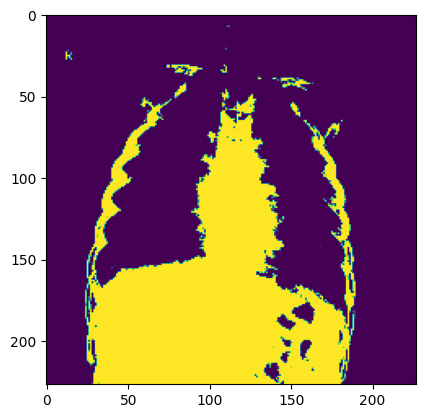

In [13]:
print(X_train.shape)
plt.imshow(X_train[0])

In [14]:

X_train = np.concatenate((X_train,) * 3, axis=-1)
X_test = np.concatenate((X_test,) * 3, axis=-1)
X_val = np.concatenate((X_val,) * 3, axis=-1)



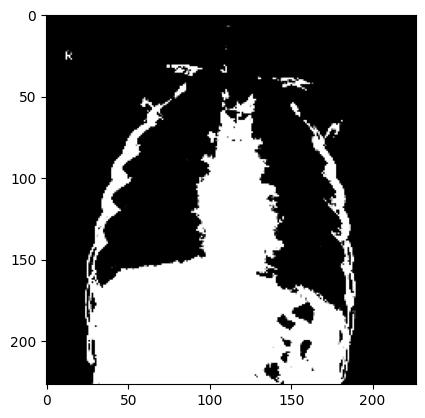

In [15]:

plt.imshow(X_train[0])

In [21]:
X_train.shape

(5216, 227, 227, 3)

In [22]:
##Creating Alexnet CNN model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [23]:
model = Sequential([
        # 1st Convolutional Layer
        Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        # 2nd Convolutional Layer
        Conv2D(filters=256, kernel_size=(5,5),padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        # 3rd Convolutional Layer
        Conv2D(filters=384, kernel_size=(3,3),padding='same', activation='relu'),
        # 4th Convolutional Layer
        Conv2D(filters=384, kernel_size=(3,3),padding='same', activation='relu'),
        # 5th Convolutional Layer
        Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        # Passing it to a Fully Connected layer
        Flatten(),
        Dropout(0.5),
        # 1st Fully Connected Layer
        Dense(4096, activation='relu'),
        Dropout(0.5),
        # 2nd Fully Connected Layer
        Dense(4096, activation='relu'),
        # Output Layer
        Dense(2, activation='sigmoid')
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,755,202 (178.36 MB)

 Trainable params: 46,755,202 (178.36 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [26]:
Alex_Net_model = model.fit(datagen.flow(X_train,Y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(X_val, Y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 439s 3s/step - accuracy: 0.7540 - loss: 1.2389 - val_accuracy: 0.5000 - val_loss: 1.4347 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 435s 3s/step - accuracy: 0.8748 - loss: 0.3180 - val_accuracy: 0.5625 - val_loss: 1.6621 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 451s 3s/step - accuracy: 0.8616 - loss: 0.3171 - val_accuracy: 0.6250 - val_loss: 0.8146 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 494s 3s/step - accuracy: 0.8791 - loss: 0.2955 - val_accuracy: 0.5625 - val_loss: 1.1197 - learning_rate: 0.0010
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9032 - loss: 0.2462
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 448s 3s/step - accuracy: 0.9031 - loss: 0.2462 - val_accuracy: 0.5625 - val_loss: 0.8212 - learning_rate: 0.0010
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 437s 3s/step - accuracy: 0.9232 - loss: 0.2053 - val_acc

In [83]:
model.save_weights("Alex_net_weights.weights.h5")
# model.save("Alex_net_model.h5")

In [28]:
pwd

'/kaggle/working'

In [29]:
print("Loss of the model is - " , model.evaluate(X_test,Y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,Y_test)[1]*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 593ms/step - accuracy: 0.7936 - loss: 0.6082
Loss of the model is -  0.3493604063987732
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 749ms/step - accuracy: 0.7936 - loss: 0.6082
Accuracy of the model is -  88.62179517745972 %


In [30]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, predicted_labels)
conf_matrix

20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 595ms/step


array([[169,  65],
       [  6, 384]])

<Axes: >

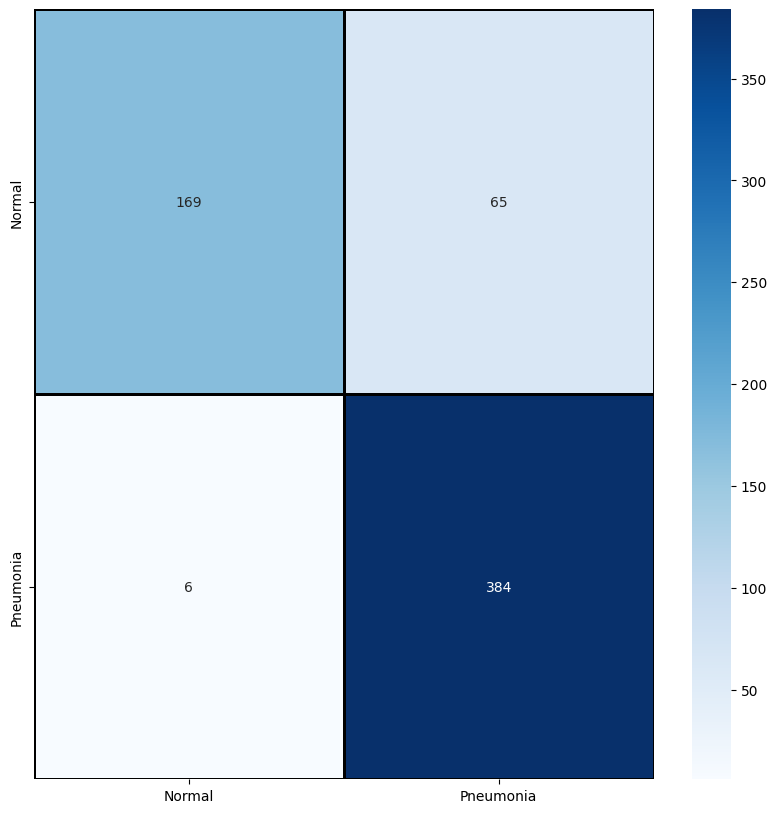

In [31]:
import seaborn as sns
import pandas as pd
labels = ['Normal','Pneumonia']
df = pd.DataFrame(conf_matrix , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

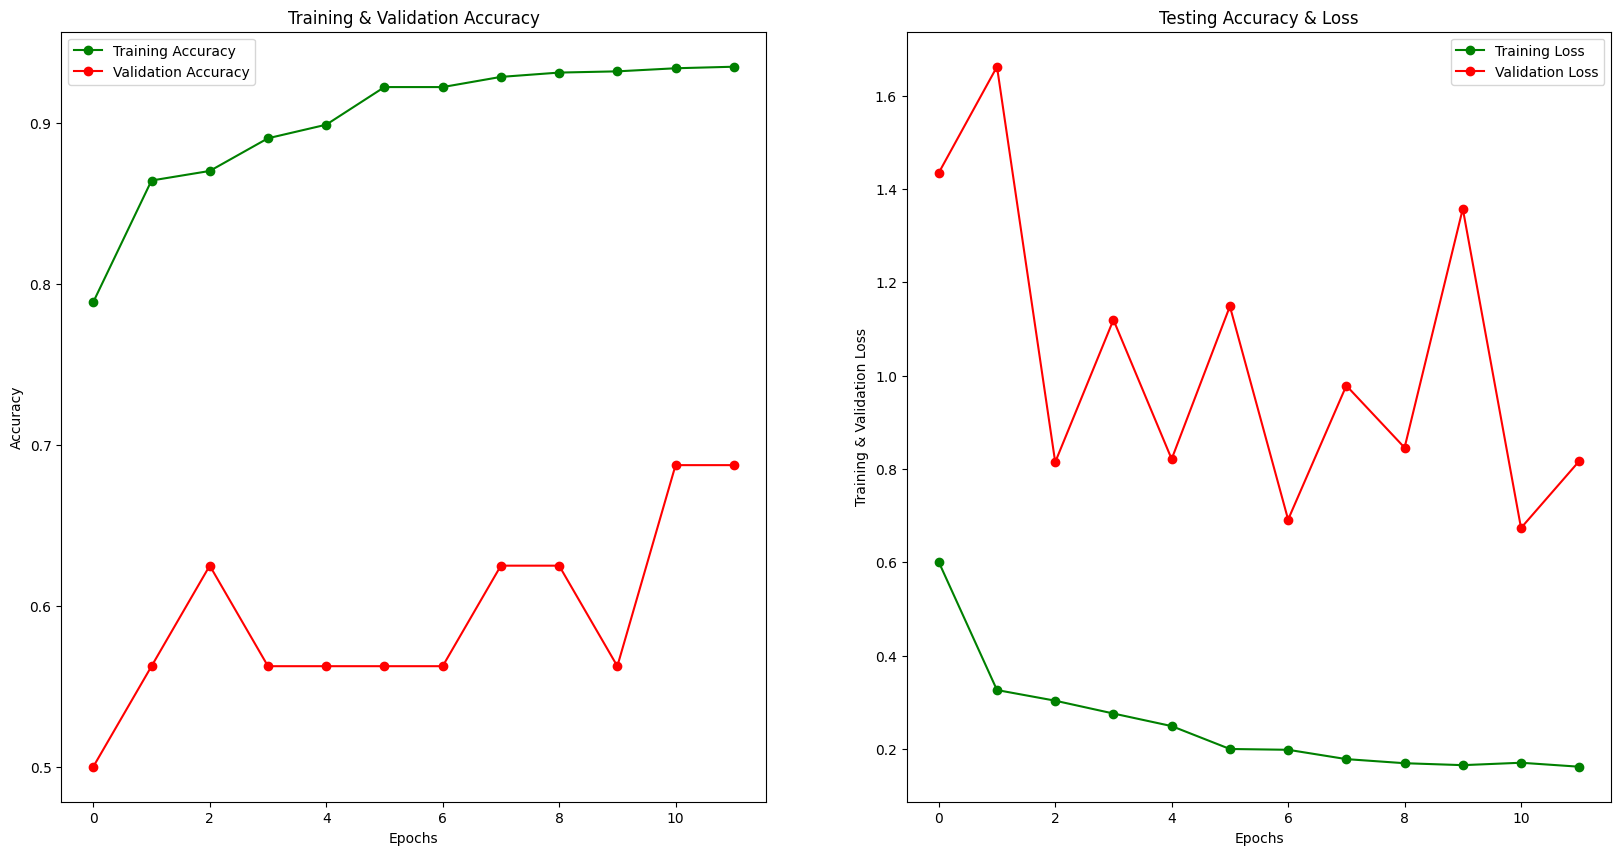

In [32]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = Alex_Net_model.history['accuracy']
train_loss = Alex_Net_model.history['loss']
val_acc = Alex_Net_model.history['val_accuracy']
val_loss = Alex_Net_model.history['val_loss']
fig.set_size_inches(20,10)

# print(len(val_acc))

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()


(227, 227)


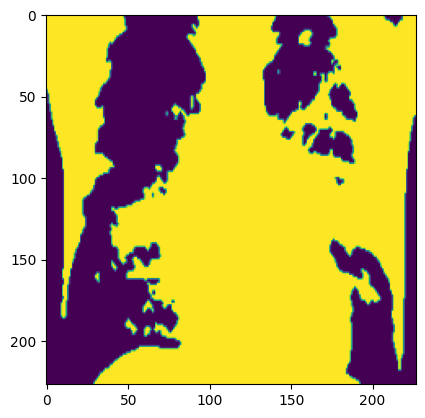

In [49]:
test_img =process_img(cv2.imread("/kaggle/input/online-test/online1.jpg"))
plt.imshow(test_img)
print(test_img.shape)

(227, 227, 3)


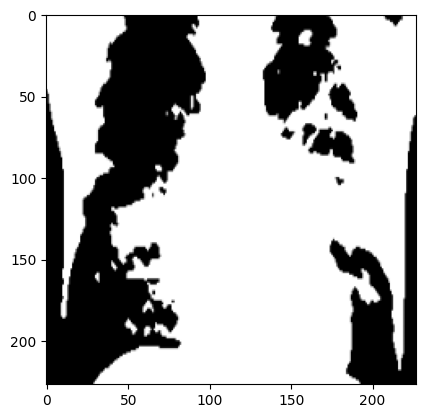

In [51]:
rgb_image = cv2.cvtColor(test_img, cv2.COLOR_GRAY2RGB)
plt.imshow(rgb_image)
print(rgb_image.shape)

In [52]:
rgb_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [54]:
rgb_image = rgb_image.astype('float32') / 255.0

In [58]:
rgb_image.shape

(227, 227, 3)

In [59]:
output_prediction = model.predict(rgb_image.reshape(1,227,227,3))
output_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[0.00608617, 0.99097747]], dtype=float32)

In [65]:
max_pred_prob = np.argmax(output_prediction)
if max_pred_prob == 0:
    print("Normal")
else:
    print("Pneumonia")       

Pneumonia


In [66]:
def predict_using_alex_net_model(img):
    processed_img = process_img(img)
    rgb_image = cv2.cvtColor(processed_img, cv2.COLOR_GRAY2RGB) ##Input of a model must be 3 channel image
    rgb_image = rgb_image.astype('float32') / 255.0
    output_prediction = model.predict(rgb_image.reshape(1,227,227,3))
    max_pred_prob = np.argmax(output_prediction)
    plt.imshow(img)
    if max_pred_prob == 0:
        print("Predicted Output: Normal")
    else:
        print("Predicted Output: Pneumonia")    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Output: Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Output: Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Output: Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Output: Pneumonia


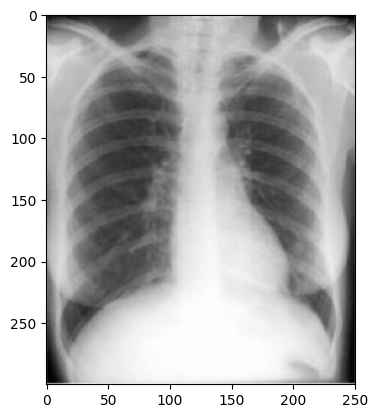

In [68]:
predict_using_alex_net_model(cv2.imread("/kaggle/input/test-datasets/online1.jpg"))
predict_using_alex_net_model(cv2.imread("/kaggle/input/test-datasets/pneumonia_2.jpg"))
predict_using_alex_net_model(cv2.imread("/kaggle/input/test-datasets/pneumonia_3.jpg"))
predict_using_alex_net_model(cv2.imread("/kaggle/input/test-datasets/pneumonia_4.jpg"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Output: Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Output: Normal


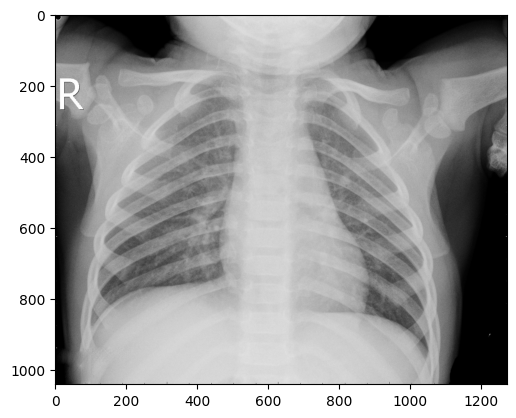

In [81]:
predict_using_alex_net_model(cv2.imread("/kaggle/input/ggggggg/NORMAL2-IM-1442-0001.jpeg"))
predict_using_alex_net_model(cv2.imread("/kaggle/input/ggggggg/NORMAL2-IM-1430-0001.jpeg"))

In [84]:
from tensorflow.keras.models import load_model

# Load the saved model
test_model = load_model('/kaggle/working/Alex_net_model.h5')

In [85]:
test_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,755,204 (178.36 MB)

 Trainable params: 46,755,202 (178.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted Output: Normal


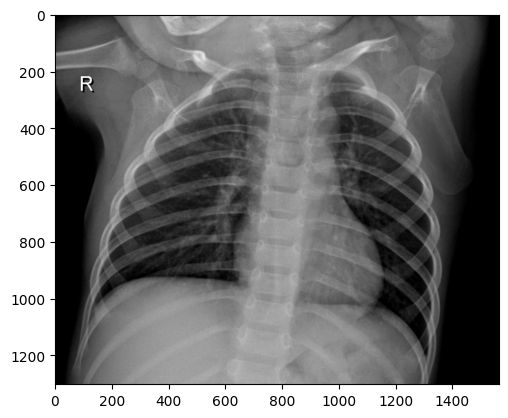

In [86]:
def predict_using_alex_net_model2(img):
    processed_img = process_img(img)
    rgb_image = cv2.cvtColor(processed_img, cv2.COLOR_GRAY2RGB) ##Input of a model must be 3 channel image
    rgb_image = rgb_image.astype('float32') / 255.0
    output_prediction = test_model.predict(rgb_image.reshape(1,227,227,3))
    max_pred_prob = np.argmax(output_prediction)
    plt.imshow(img)
    if max_pred_prob == 0:
        print("Predicted Output: Normal")
    else:
        print("Predicted Output: Pneumonia")   
        
predict_using_alex_net_model2(cv2.imread("/kaggle/input/ggggggg/NORMAL2-IM-1442-0001.jpeg"))